In [1]:
import requests
import random
import re
import pickle
import numpy as np
from PIL import Image
from io import BytesIO
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from math import sqrt
import urllib
import pickle

In [2]:
headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) '
                  'AppleWebKit/537.36 (KHTML, like Gecko) '
                  'Chrome/53.0.2785.143 Safari/537.36'
}

In [17]:
COLORS = {}
#try:
#    with open('colors.pkl', 'rb') as f:
#        COLORS = pickle.load(f)
#except IOError:
#    pass

In [3]:
def get_word_color(word, COLORS):
    if word in COLORS.keys():
        return COLORS[word]
    print("Govno")
    r = requests.get("https://duckduckgo.com/?q=%s&t=h_&iax=images&ia=images" % "+".join(word.split()), headers=headers)
    text = r.text 
  
    #text = str((urllib.request.urlopen("https://duckduckgo.com/?q=%s&t=h_&iax=images&ia=images" % "+".join(word.split()))).read(), encoding='utf-8')
  
    #print(text)
    links = [i[0] for i in re.findall("(https?:/{2}\S+\.(png|jpg|gif))", text)]
    colors = []
    #print(links)
    
    for link in links:
        response = requests.get(link)
        img = Image.open(BytesIO(response.content))
        img = img.convert("RGB")
        img = img.resize((100, 100))
    
        data = list(img.getdata())     
        km = KMeans(n_clusters=3)
        km.fit(data)
    
        colors.extend(km.cluster_centers_)
  
        if len(colors) >= 30:
           break
    
    if (np.array(colors).ndim == 2):
        km = KMeans(n_clusters=3)
        km.fit(colors)
        centers = km.cluster_centers_
    else:
        centers = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255),) for _ in range(10)]
  
    colors = [(int(i[0]), int(i[1]), int(i[2]),) for i in centers]
    if colors[1] not in COLORS.values():
        COLORS[word] = colors[1]
    else:
        if colors[0] not in COLORS.values():
            COLORS[word] = colors[0]
        elif colors[2] not in COLORS.values():
            COLORS[word] = colors[2]
        else:
            color = colors[1]
            while color in COLORS.values():
                i = random.randint(0, 2)
                color = list(color)
                color[i] += random.randint(-2, 2)
                if color[i] >= 255:
                    color[i] = 255
                elif color[i] <= 0:
                    color[i] = 0
                color = tuple(color)
            COLORS[word] = colo
        
    colors = []
    max_color = max(COLORS[word])
    for color in COLORS[word]:
       # c = int(color/max_color * (max_color//2))
        colors.append(color)
       # print(c)
    
    return colors
  

In [19]:
def parse_text(text):
  PUNCTUATION = {' ', ',', ';', ':', '-', '\n'}
  SENTENCE_SPLITERS = {'.', '!', '?'}
  
  text = text.lower()
  
  words = []
  pairs = []
  
  word = ""
  for ch in text:
    if ch not in PUNCTUATION and ch not in SENTENCE_SPLITERS:
      word += ch
    else:
      if word:
        words.append(word)
      word = ""
  return words

In [26]:
#def get_word_color(kek, lol):
  #  return [48,47,67]
for word in parse_text(text): 
    while True:
        #try:
            print("kek")
            color = get_word_color(word, COLORS)
            print(color)
            max_color = max(color)
            colors = []
            for i in range(len(color)):
                if color[i] == max_color:
                    color[i]*=1.3
            color = list(map(lambda x: 254 if x>=255 else x, color))
            print(color)   
            #print(word , get_word_color(word, c))            
            break
        #except:
          #  continue

kek
Govno


c:\pythonprojects\colors\venv\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)


[82, 84, 72]
[82, 109.2, 72]


In [9]:
def text_to_image(text):
  words = parse_text(text)
  img = []
  for word in words:
    img.append(get_word_color(word, COLORS))
  img = np.array(img, dtype='object')[:64]
  img = img.reshape(8, 8, 3)
  return img
  #plt.imshow(img)

In [7]:
text = """
Shall I compare thee to a summer’s day?
Thou art more lovely and more temperate.
Rough winds do shake the darling buds of May,
And summer’s lease hath all too short a date.
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimmed;
And every fair from fair sometime declines,
By chance, or nature’s changing course, untrimmed;
But thy eternal summer shall not fade,
Nor lose possession of that fair thou ow’st,
Nor shall death brag thou wand’rest in his shade,
When in eternal lines to Time thou grow’st.
     So long as men can breathe, or eyes can see,
     So long lives this, and this gives life to thee."""

In [11]:
text = """
A hundred suns the sunset fired,
into July summer shunted,
it was so hot,
even heat perspired-
it happened in the country.
The little hamlet known as Pushkino,
Akula's Mount
made hunchbacked.
Below, the village
seemed pushed-in so --
its crooked roof-crusts cracked.
And beyond that village
yawned a hole,
into that hole- and not just maybe -
the sun for certain always rolled,
slowly, surely, daily.
At morn
to flood the world
again
the sun rose up-
and ruddied it.
Day after day
it happened this way,
till I got 
fed up with it.
And one day I let out such a shout,
that everything grew pale,
point-blank at the sun I yelled:
'Get out!
Enough of loafing there in hell!'
To the sun I yelled:
'You lazy mummer!
in the clouds cushioning,
while here - knowing neither winter nor summer,
I sit, just posters brushing!'
I yelled to the sun:
"""

In [25]:
text = "banana banana"

In [136]:
img = text_to_image(text)
img.shape

(8, 8, 3)

In [27]:
img = img.astype(float)/255
plt.imshow(img[::,::,::-1])
#img[0,0,::-1]

NameError: name 'img' is not defined

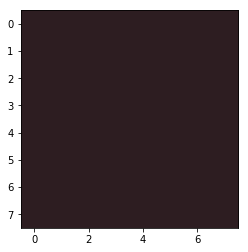

In [134]:
#"winter men summer sun sunset death lovely "
plt.imshow(img[:,:,::])

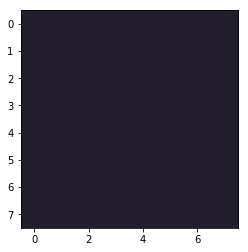

In [135]:
#"winter men summer sun sunset death lovely "
plt.imshow(img[:,:,::-1])

In [1]:
text = """
A hundred suns the sunset fired,
into July summer shunted,
it was so hot,
even heat perspired-
it happened in the country.
The little hamlet known as Pushkino,
Akula's Mount
made hunchbacked.
Below, the village
seemed pushed-in so --
its crooked roof-crusts cracked.
And beyond that village
yawned a hole,
into that hole- and not just maybe -
the sun for certain always rolled,
slowly, surely, daily.
At morn
to flood the world
again
the sun rose up-
and ruddied it.
Day after day
it happened this way,
till I got 
fed up with it.
And one day I let out such a shout,
that everything grew pale,
point-blank at the sun I yelled:
'Get out!
Enough of loafing there in hell!'
To the sun I yelled:
'You lazy mummer!
in the clouds cushioning,
while here - knowing neither winter nor summer,
I sit, just posters brushing!'
I yelled to the sun:
"""

In [3]:
len(text.split())

152

In [ ]:
r = requests.get()